In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input/krediveriseti/krediVeriseti.csv'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/krediveriseti/krediVeriseti.csv


In [5]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt

framework = pd.read_csv("/kaggle/input/krediveriseti/krediVeriseti.csv",sep=";")
framework

,krediMiktari,yas,evDurumu,aldigi_kredi_sayi,telefonDurumu,KrediDurumu
0,1169,67,evsahibi,2,var,krediver
1,5951,22,evsahibi,1,yok,verme
2,2096,49,evsahibi,1,yok,krediver
3,7882,45,kiraci,1,yok,krediver
4,4870,53,kiraci,2,yok,verme
...,...,...,...,...,...,...
995,1736,31,evsahibi,1,yok,krediver
996,3857,40,evsahibi,1,var,krediver
997,804,38,evsahibi,1,yok,krediver
998,1845,23,kiraci,1,var,verme


In [6]:
from sklearn.preprocessing import LabelEncoder
ownership=LabelEncoder()
telephone=LabelEncoder()
credit_suitability=LabelEncoder()
framework["evDurumu"]=ownership.fit_transform(framework["evDurumu"])
framework["telefonDurumu"]=telephone.fit_transform(framework["telefonDurumu"])
framework["KrediDurumu"]=credit_suitability.fit_transform(framework["KrediDurumu"])
framework





,krediMiktari,yas,evDurumu,aldigi_kredi_sayi,telefonDurumu,KrediDurumu
0,1169,67,0,2,0,0
1,5951,22,0,1,1,1
2,2096,49,0,1,1,0
3,7882,45,1,1,1,0
4,4870,53,1,2,1,1
...,...,...,...,...,...,...
995,1736,31,0,1,1,0
996,3857,40,0,1,0,0
997,804,38,0,1,1,0
998,1845,23,1,1,0,1


In [7]:
X=framework.drop("KrediDurumu",axis=1)
X

,krediMiktari,yas,evDurumu,aldigi_kredi_sayi,telefonDurumu
0,1169,67,0,2,0
1,5951,22,0,1,1
2,2096,49,0,1,1
3,7882,45,1,1,1
4,4870,53,1,2,1
...,...,...,...,...,...
995,1736,31,0,1,1
996,3857,40,0,1,0
997,804,38,0,1,1
998,1845,23,1,1,0


In [8]:
Y=framework["KrediDurumu"]
Y

0      0
1      1
2      0
3      0
4      1
      ..
995    0
996    0
997    0
998    1
999    0
Name: KrediDurumu, Length: 1000, dtype: int64

In [9]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=42)

In [12]:
from sklearn.ensemble import RandomForestRegressor


model=RandomForestRegressor(random_state=42,n_estimators=100)
model

RandomForestRegressor(random_state=42)

In [15]:
model.fit(X_train,Y_train)

RandomForestRegressor(random_state=42)

In [18]:
Y_prediction=model.predict(X_test)
Y_prediction


array([0.12, 0.29, 0.14, 0.83, 0.2 , 0.42, 0.53, 0.53, 0.07, 0.51, 0.24,
       0.21, 0.58, 0.23, 0.25, 0.63, 0.52, 0.23, 0.29, 0.03, 0.18, 0.21,
       0.09, 0.14, 0.39, 0.2 , 0.47, 0.06, 0.71, 0.01, 0.31, 0.23, 0.06,
       0.15, 0.1 , 0.18, 0.38, 0.12, 0.17, 0.58, 0.52, 0.17, 0.04, 0.08,
       0.08, 0.11, 0.64, 0.59, 0.11, 0.36, 0.33, 0.26, 0.04, 0.04, 0.48,
       0.18, 0.19, 0.91, 0.53, 0.06, 0.53, 0.07, 0.28, 0.02, 0.57, 0.06,
       0.03, 0.07, 0.15, 0.01, 0.15, 0.06, 0.04, 0.57, 0.63, 0.38, 0.03,
       0.4 , 0.2 , 0.51, 0.21, 0.37, 0.09, 0.37, 0.33, 0.53, 0.26, 0.9 ,
       0.25, 0.39, 0.93, 0.28, 0.57, 0.42, 0.01, 0.35, 0.16, 0.22, 0.93,
       0.29, 0.04, 0.59, 0.68, 0.05, 0.06, 0.23, 0.43, 0.52, 0.29, 0.39,
       0.61, 0.28, 0.85, 0.12, 0.24, 0.11, 0.03, 0.  , 0.37, 0.23, 0.13,
       0.8 , 0.12, 0.07, 0.4 , 0.54, 0.8 , 0.72, 0.63, 0.6 , 0.62, 0.14,
       0.18, 0.05, 0.3 , 0.25, 0.51, 0.  , 0.49, 0.14, 0.61, 0.86, 0.43,
       0.05, 0.06, 0.32, 0.04, 0.18, 0.38, 0.22, 0.

In [23]:
from sklearn.metrics import mean_squared_error,r2_score
import numpy as np


mse=mean_squared_error(Y_test,Y_prediction)

print(mse, "mean squared error")

rmse=np.sqrt(mse)

print(rmse,"square root of mse")

r2 = r2_score(Y_test, Y_prediction)
print(r2, "r square")


0.2318985 mean squared error
0.48155840767242347 square root of mse
-0.11503065272268276 r square


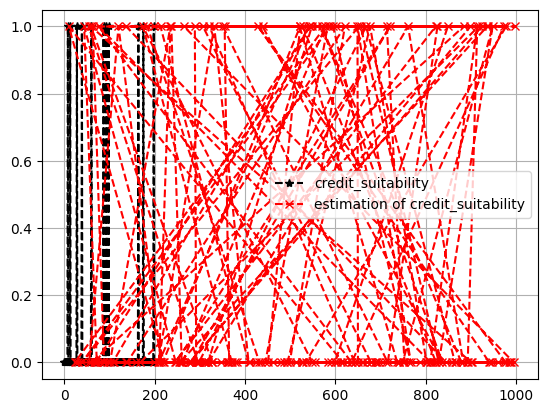

In [35]:
plt.plot(Y_prediction,label="credit_suitability",color="black",marker="*",linestyle="--")
plt.plot(Y_test,label="estimation of credit_suitability",color="red",marker="x",linestyle="--")
plt.grid(True)
plt.legend()


In [24]:
X=framework[["krediMiktari","yas","evDurumu","aldigi_kredi_sayi","telefonDurumu"]]
X

,krediMiktari,yas,evDurumu,aldigi_kredi_sayi,telefonDurumu
0,1169,67,0,2,0
1,5951,22,0,1,1
2,2096,49,0,1,1
3,7882,45,1,1,1
4,4870,53,1,2,1
...,...,...,...,...,...
995,1736,31,0,1,1
996,3857,40,0,1,0
997,804,38,0,1,1
998,1845,23,1,1,0


In [25]:
Y=framework["KrediDurumu"]
Y

0      0
1      1
2      0
3      0
4      1
      ..
995    0
996    0
997    0
998    1
999    0
Name: KrediDurumu, Length: 1000, dtype: int64

In [26]:
from sklearn.model_selection import train_test_split

X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=42)

In [28]:
from sklearn.linear_model import LogisticRegression

regressor=LogisticRegression()

regressor.fit(X_train,Y_train)

LogisticRegression()

In [32]:
Y_prediction=regressor.predict(X_test)
Y_prediction

array([0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0])

In [33]:
from sklearn.metrics import accuracy_score
accuracy=accuracy_score(Y_test,Y_prediction)


print("Accuracy score of sale dataset, accuracy:",accuracy)

Accuracy score of sale dataset, accuracy: 0.69


In [ ]:
#Logistic Regression with 0.69 accuracy rate  is better than RandomForestRegressor with negative r2 which performs
#worse than a simple mean prediction and suggests a very poor fit.